# Intermolecular Potentials

The collective behavior that emerges from using the application of statistical mechanics concepts to molecular systems emerges from interactions between atoms. Interatomic interactions are inherently governed by quantum mechanics, however suitable approximations that capture their essential physics in a computationally tractable manner have been historically adopted to describe fluids at the atomistic level. 

The theory of Intermolecular forces provides a somewhat arbitrary classification of Intermolecular that includes four main categories: 

- Electrostatic forces: are the attractive or repulsive forces between permanent charges or dipoles/quadrupoles and higher multipoles.

- Induction forces: are the forces between a permanent charge or dipole, and a molecule with polarizable electrons. 

- Dispersion forces: are the intermolecular forces acting between nonpolar, neutral molecules. 

- Specific chemical forces: H-bonds are a typical example. 

In these notes we briefly discuss the intermolecular potentials resulting from electrostatic and dispersion forces. 

## Electrostatic interactions between point charges. 

Consider two charged atoms, (i.e. two ions) their two-body interatomic potential is $\Gamma_{i,j}$: 

$$
\Gamma^{ele}_{i,j}=\frac{q_iq_j}{4\pi\epsilon\,r_{i,j}}
$$

where: 

$q_i$ and $q_j$ are the _partial_ charges of atoms $i$ and $j$, $\epsilon$ is the medium permittivity, and $r$ the distance between atoms $i$ and $j$.

## Interatomic potentials emerging from dispersion forces. 

In the 1930s London demonstrated that non-polar molecules are characterised by transient dipoles due to transient distortions of the electrons arrangement with respect to the position of the nucleus. As such, while the time-average of the dipole for non-polar molecules is null, the instantaneous dipole is non-negligible and induces a short range attraction that scales with the sixth power of the distance beween molecules, i.e.: 

$$
\Gamma^{attractive}_{i,j}\propto{-r_{i,j}^{-6}}
$$

where the negative sign indicates an attractive potential. 

In addition to the attraction associated with transient dipoles, non-polar molecules are subject to repulsive forces at short values of $r_{i,j}$. 
Such repulsive potential scales exponentially with the distance between molecules, however for convenience the contribution of these repulsive forces is computed as a power of $1/r$. 
Typically one can write: 

$$
\Gamma^{repulsive}_{i,j}\propto{r_{i,j}^{-n}}
$$

where $n$ is an arbitrary number, and typically $n>6$. 

The total interaction potential between non-polar molecules is therefore represented by the sum of the attractive dispersion forces, and the repulsive forces active at short range. 

$$
\Gamma^{non-polar}_{i,j}=Ar_{i,j}^{-n}-Ar_{i,j}^{-m}
$$

where $m$ is typically 6. 

A general functional form for an intermolecular potential has been developed by Mie in the following form:

$$
\Gamma^{non-polar}_{i,j}=\frac{\epsilon\left(n^n/m^m\right)^{1/(n-m)}}{n-m}\left[\left(\frac{\sigma}{r_{i,j}}\right)^n-\left(\frac{\sigma}{r_{i,j}}\right)^m\right]
$$
 
 
Substituting n=12 and m=6 in the Mie potential one can obtain the Lennard Jones Potential. 
 
$$
\Gamma^{LJ}_{i,j}=4\epsilon\left[\left(\frac{\sigma}{r_{i,j}}\right)^{12}-\left(\frac{\sigma}{r_{i,j}}\right)^6\right]
$$

where $\epsilon$ represents the depth of the attractive well, and $\sigma$ the distance at which the repulsive and attractive contributes to the potential compensate perfectly. 

The intermolecular interaction between methane molecules can be captured by the following expressions: 

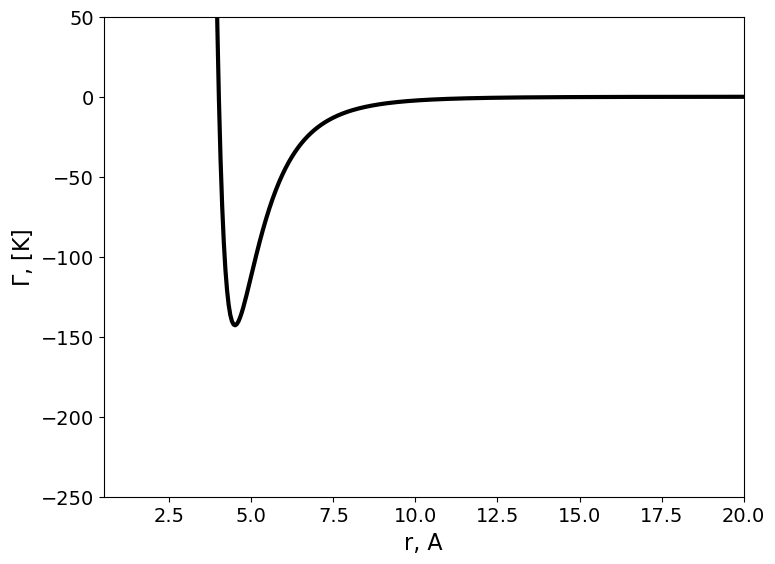

In [1]:
import matplotlib.pyplot as plt 
from matplotlib import cm
import numpy as np


figure=plt.figure()
axes = figure.add_axes([0.1,0.1,1,1])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
axes.set_xlabel('r, A', fontsize=16);
axes.set_ylabel('$\Gamma$, [K]',fontsize=16);
axes.set_xlim([0.5,20]);
axes.set_ylim([-250,50]);


#Intermolecular Potential, i.e. LJ 6/12
#Species=[Ar]
SIGMA=[4.010, ] # Angstrom
EPS=[ 142.87,] #K 


r = np.linspace(0.3, 25, 500)
Gamma=np.zeros((np.size(r),np.size(SIGMA)))


color=iter(cm.gist_gray(np.linspace(0,1,np.size(SIGMA)+1)))

# Consider a LJ gas
for i in np.arange(0,np.size(SIGMA)):
    c=next(color)
    sr6=np.power(np.divide(SIGMA[i],r),6)
    Gamma[:,i]=4*EPS[i]*(np.power(sr6,2)-sr6)
    axes.plot(r,Gamma[:,i], marker=' ' , c=c, linewidth=3.0);
